1. As with encoded vs. unencoded data, we recommend exploring un-scaled data in your EDA process.

2. Make sure to perform a train, validate, test split before and use only your train dataset to explore the relationships between independent variables with other independent variables or independent variables with your target variable.

3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

5. Save the functions you have written to create visualizations in your explore.py file. Rewrite your notebook code so that you are using the functions imported from this file.

6. Use the functions you created above to explore your Zillow train dataset in your explore.ipynb notebook.

7. Come up with some initial hypotheses based on your goal of predicting property value.

8. Visualize all combinations of variables in some way.

9. Run the appropriate statistical tests where needed.

10. What independent variables are correlated with the dependent variable, home value?

11. Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

12. Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

13. Explore your dataset with any other visualizations you think will be helpful.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr

# set up figure size: plt.figure(figsize=(16, 3))

In [2]:
from wrangle import wrangle_zillow, split_zillow
df_zillow = wrangle_zillow()

In [4]:
df = df_zillow.copy()

In [5]:
train, validate, test = split_zillow(df)

In [6]:
train.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
176880,3,2.0,1714,115157,1973,1282.32,6059
331975,3,3.0,1862,345618,1958,5530.82,6059
1753349,5,5.0,3959,1451000,1953,15884.95,6037
120218,3,3.0,2100,459187,1962,5619.06,6037
1991743,4,2.0,1954,403193,1980,5047.67,6037


### 3. Write a function named plot_variable_pairs that accepts a dataframe as input and plots all of the pairwise relationships along with the regression line for each pair.

In [48]:
train.sample(100)

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
1294901,3,2.0,1646,436211,1959,5537.62,6037
1368118,3,2.0,1207,123748,1956,1894.18,6037
1627462,2,1.0,1242,280920,1948,3068.71,6037
1510445,3,2.0,1303,271617,1959,3459.87,6037
1950668,6,4.0,3441,1289367,2006,15228.37,6037
...,...,...,...,...,...,...,...
643492,2,2.0,1438,111433,1949,1423.34,6037
1407898,3,2.0,1658,362860,1964,3975.08,6037
1720276,4,2.0,1892,246000,1994,3901.94,6037
1476068,3,2.5,1801,427233,1985,4459.66,6059


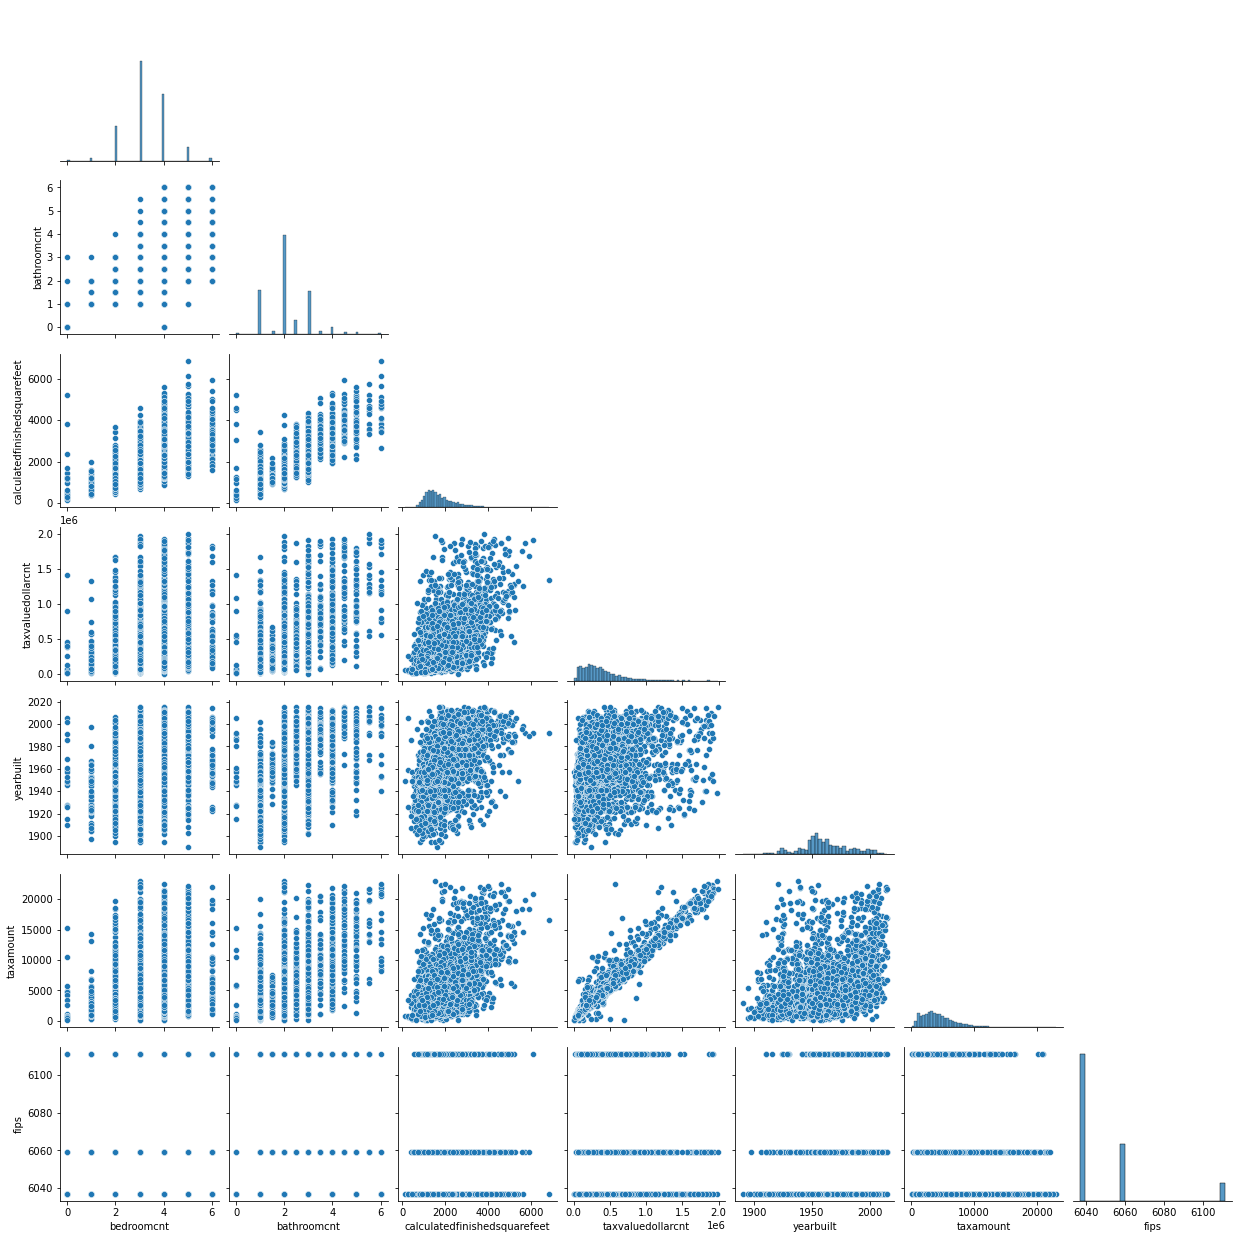

In [63]:
sns.pairplot(train.sample(5000), corner=True)

In [161]:
def plot_variable_pairs(df):
    sns.pairplot(df, corner=True)
    plt.show()

### 4. Write a function named plot_categorical_and_continuous_vars that accepts your dataframe and the name of the columns that hold the continuous and categorical features and outputs 3 different plots for visualizing a categorical variable and a continuous variable.

In [16]:
categorical_vars = ['bedroomcnt', 'bathroomcnt', 'yearbuilt', 'fips']
continuous_vars = ['calculatedfinishedsquarefeet', 'taxvaluedollarcnt', 'taxamount']

<AxesSubplot:xlabel='bedroomcnt', ylabel='count'>

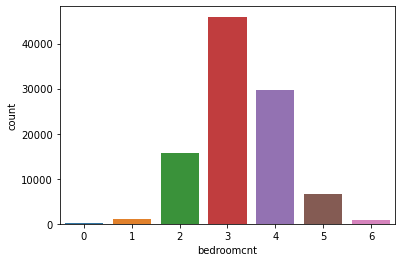

In [155]:
# categorical data overview
sns.countplot(data = train.sample(100000, random_state=123), x ='bedroomcnt')

* 3 bedrooms has the largest amount. 

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

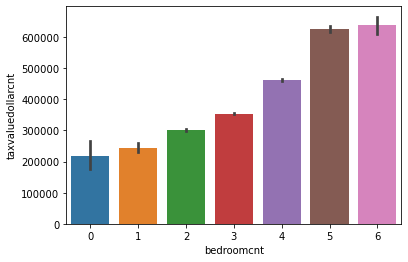

In [156]:
sns.barplot(data = train.sample(100000, random_state=123), x ='bedroomcnt', y = 'taxvaluedollarcnt')

In [ ]:
* 6 bedrooms has the highest asset value

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

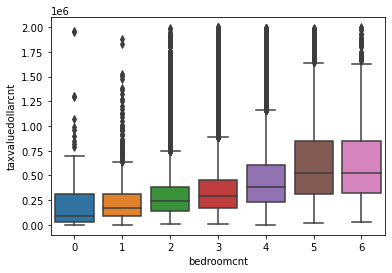

In [157]:
sns.boxplot(data = train.sample(100000, random_state=123), x ='bedroomcnt', y = 'taxvaluedollarcnt')

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

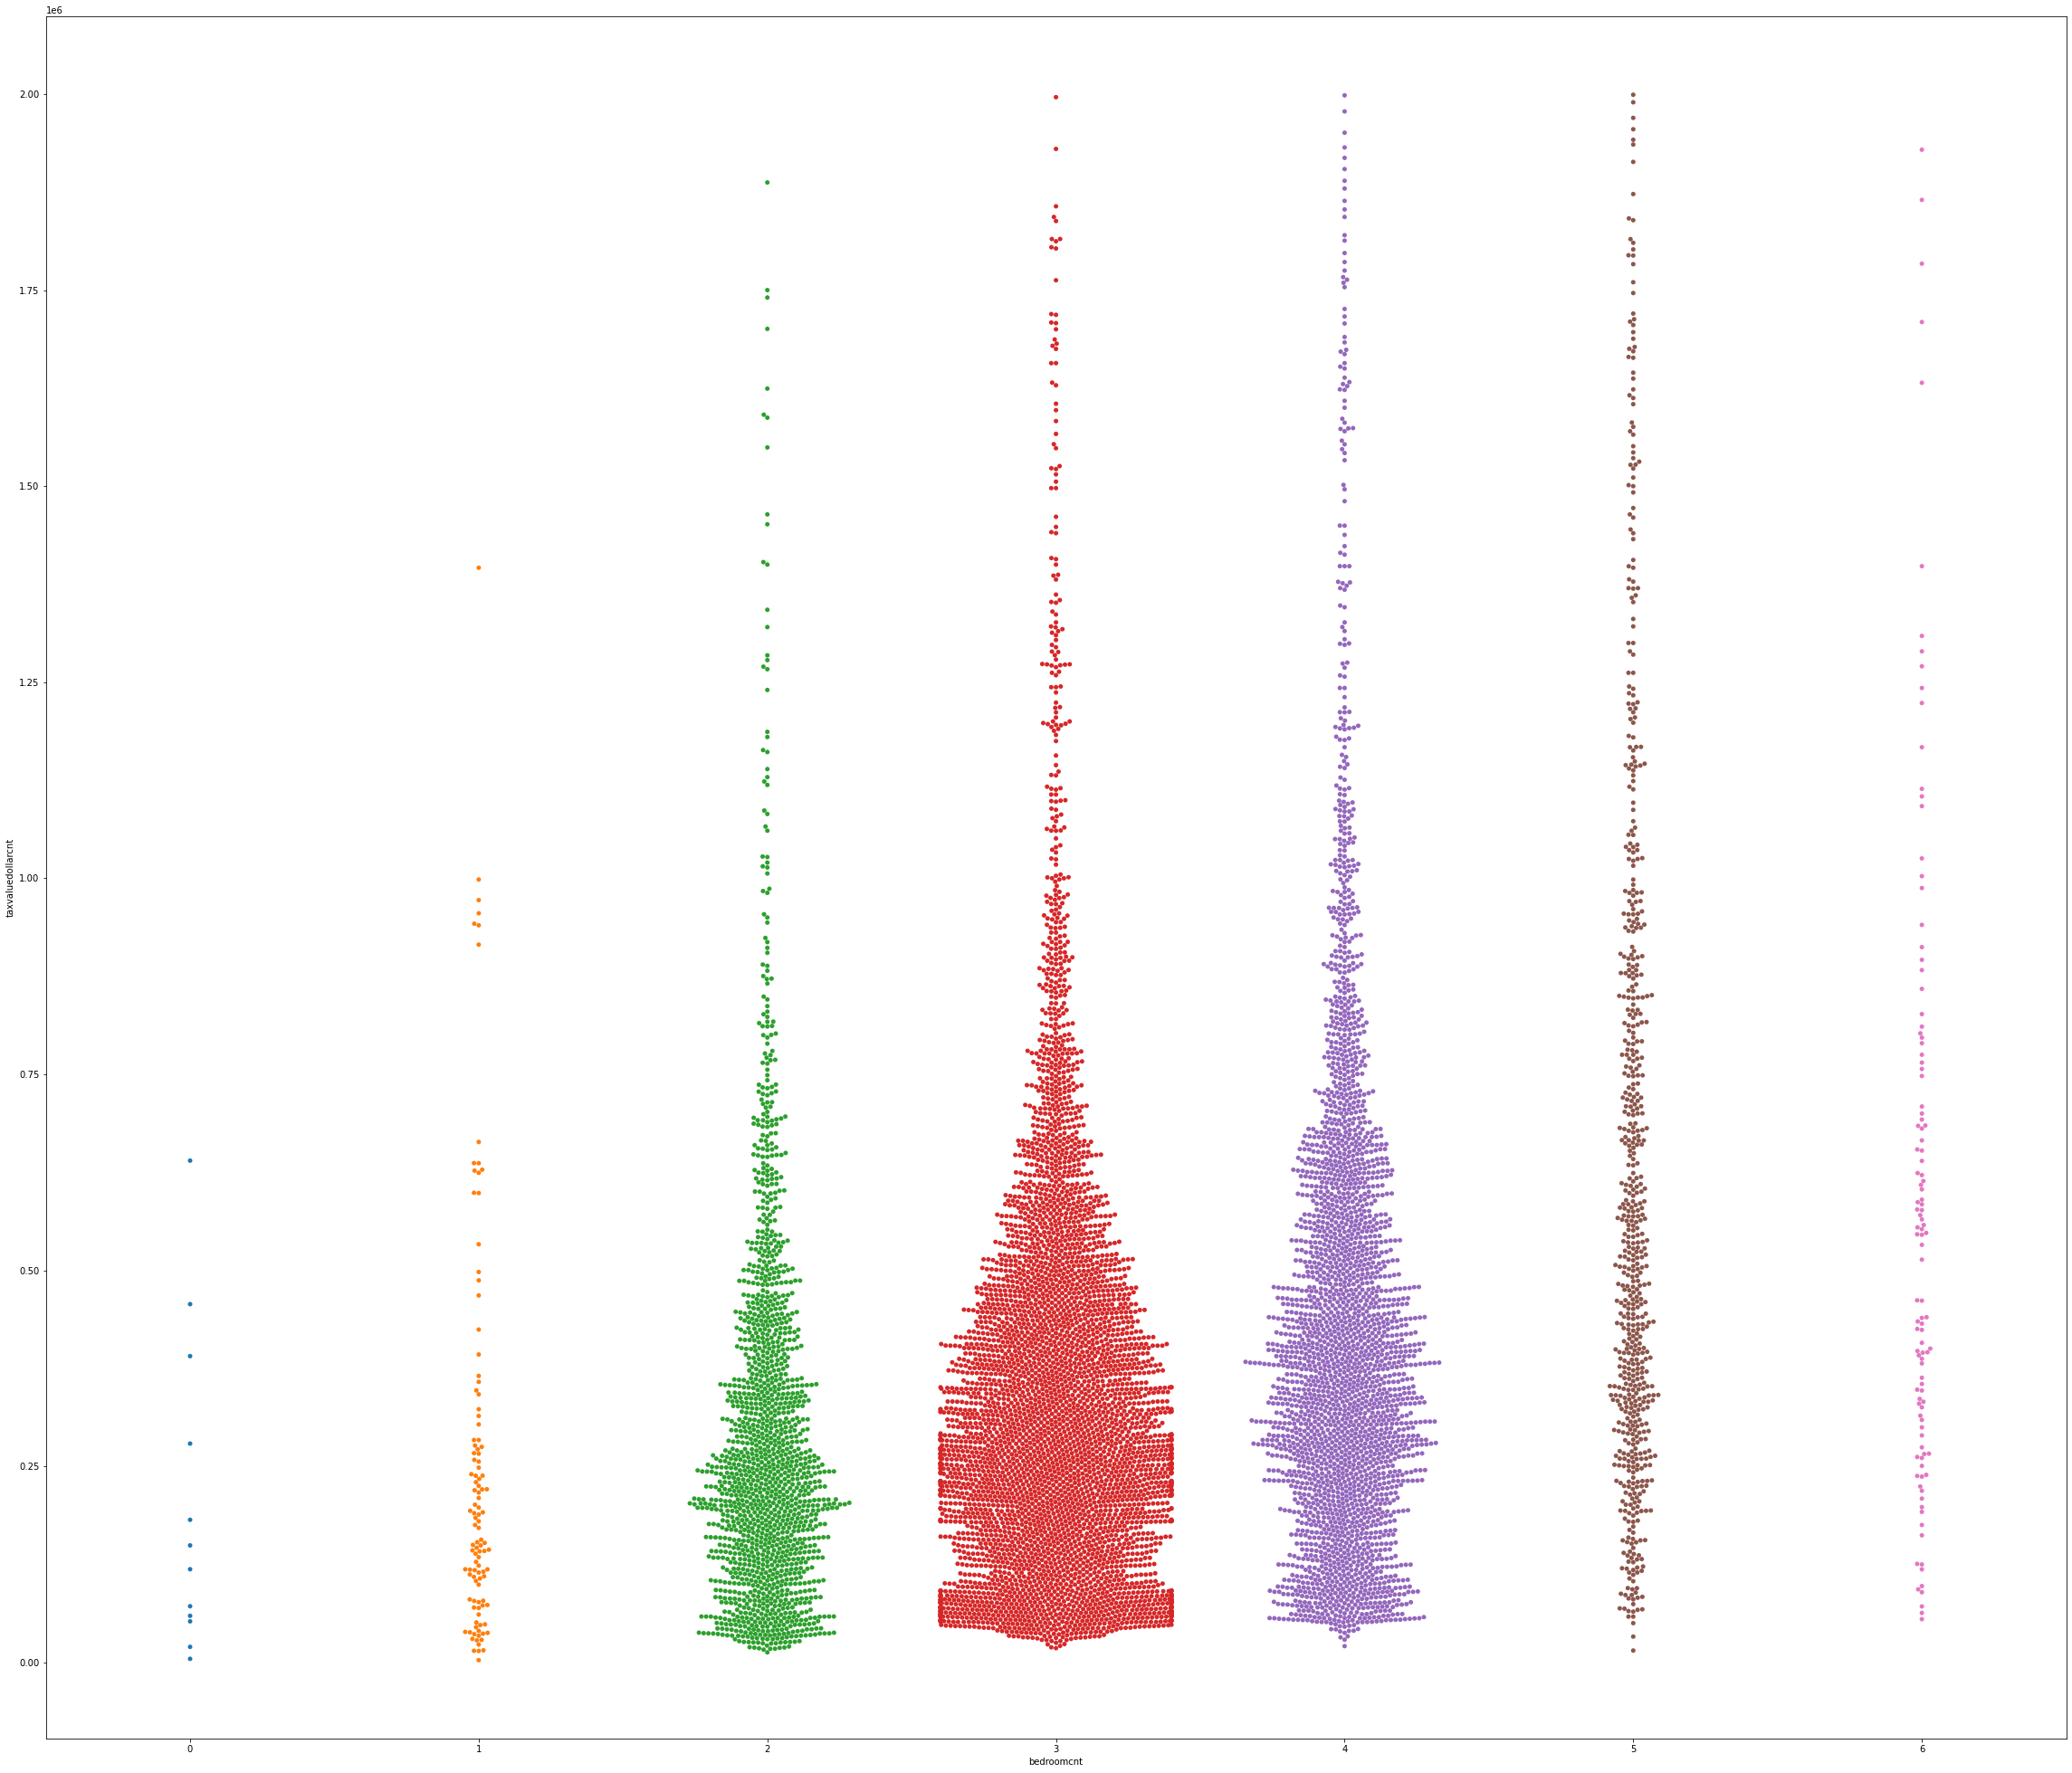

In [131]:
plt.figure(figsize=(40, 35))
sns.swarmplot(data = train.sample(10000, random_state=123), x ='bedroomcnt', y = 'taxvaluedollarcnt')

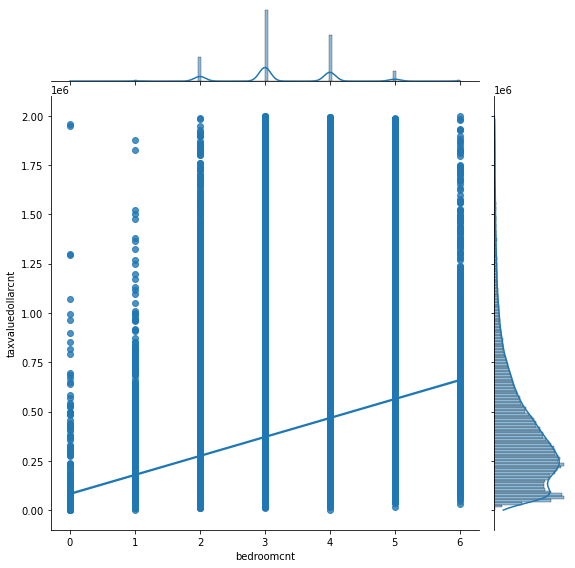

In [158]:
sns.jointplot("bedroomcnt", "taxvaluedollarcnt", data=train.sample(100000, random_state=123), kind='reg', height=8);
plt.show()

In [204]:
def plot_categorical_and_continous_vars(categorical_var, continuous_var, df):
    
    figure, axes = plt.subplots(1,4, figsize=(25,12))
    
    sns.countplot(x=categorical_var, data=df.sample(10000, random_state=123), ax=axes[0])
    sns.barplot(x=categorical_var, y=continuous_var, data=df.sample(10000, random_state=123), ax=axes[1])
    sns.boxplot(categorical_var, continuous_var, data=df.sample(10000, random_state=123), ax=axes[2])
    sns.jointplot(x=categorical_var, y=continuous_var, data=train.sample(10000, random_state=123), kind='reg', ax=axes[3])
    
    plt.show()

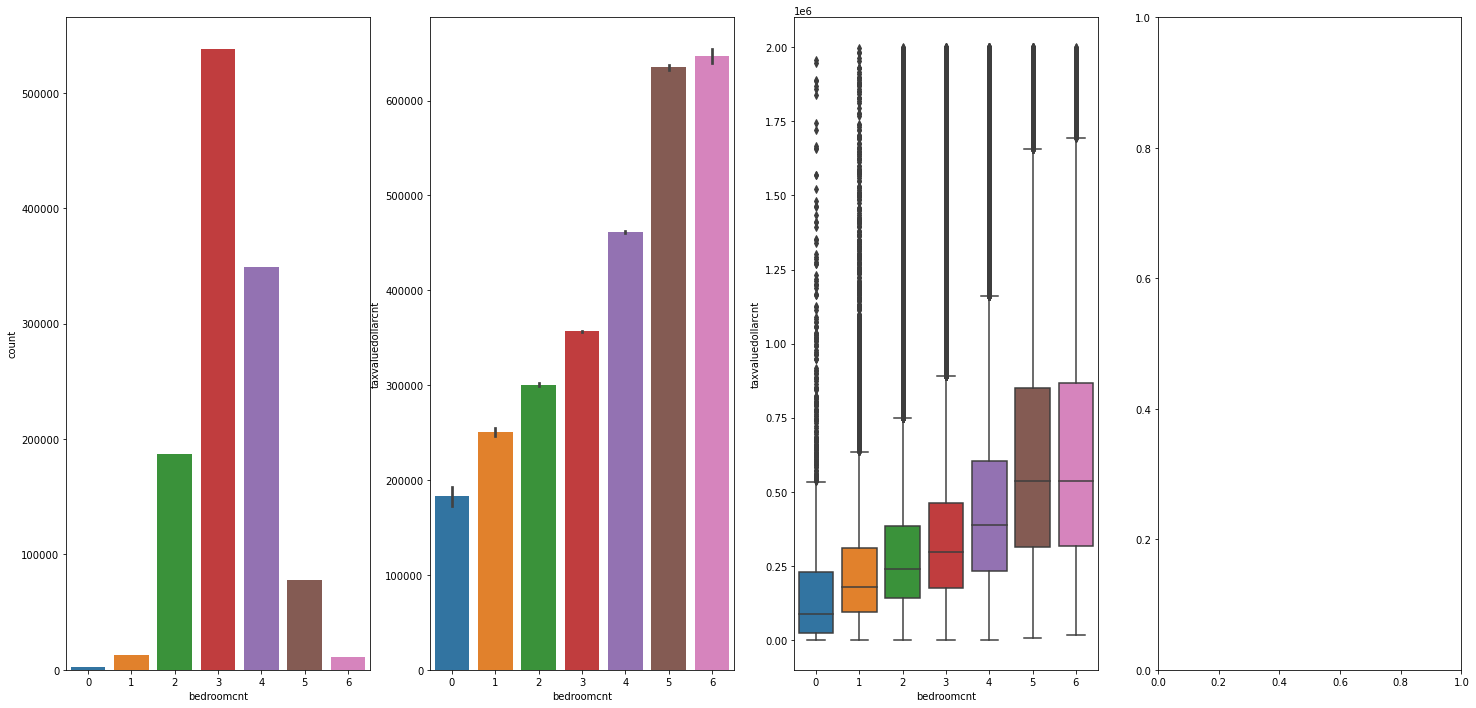

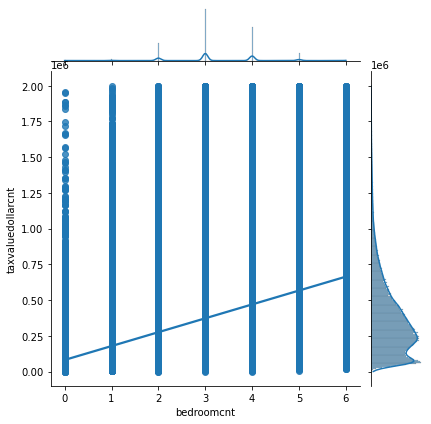

In [205]:
plot_categorical_and_continous_vars(train.bedroomcnt, train.taxvaluedollarcnt, train)

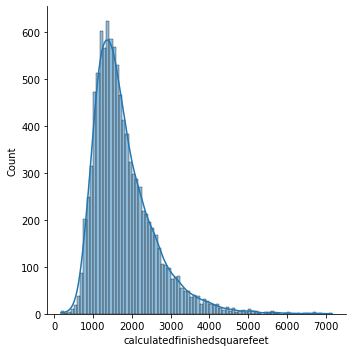

In [180]:
# continuous, sample size = 10000

sns.displot(x='calculatedfinishedsquarefeet', data=train.sample(10000, random_state=123), kde=True)

### 7. Come up with some initial hypotheses based on your goal of predicting property value.

* what is the relationship between squarefeet and tax value?
* bedroom count and tax value?
* bathroom count and tax value?
* fips and tax value?
* yearbuilt and tax value?

### 8. Visualize all combinations of variables in some way.

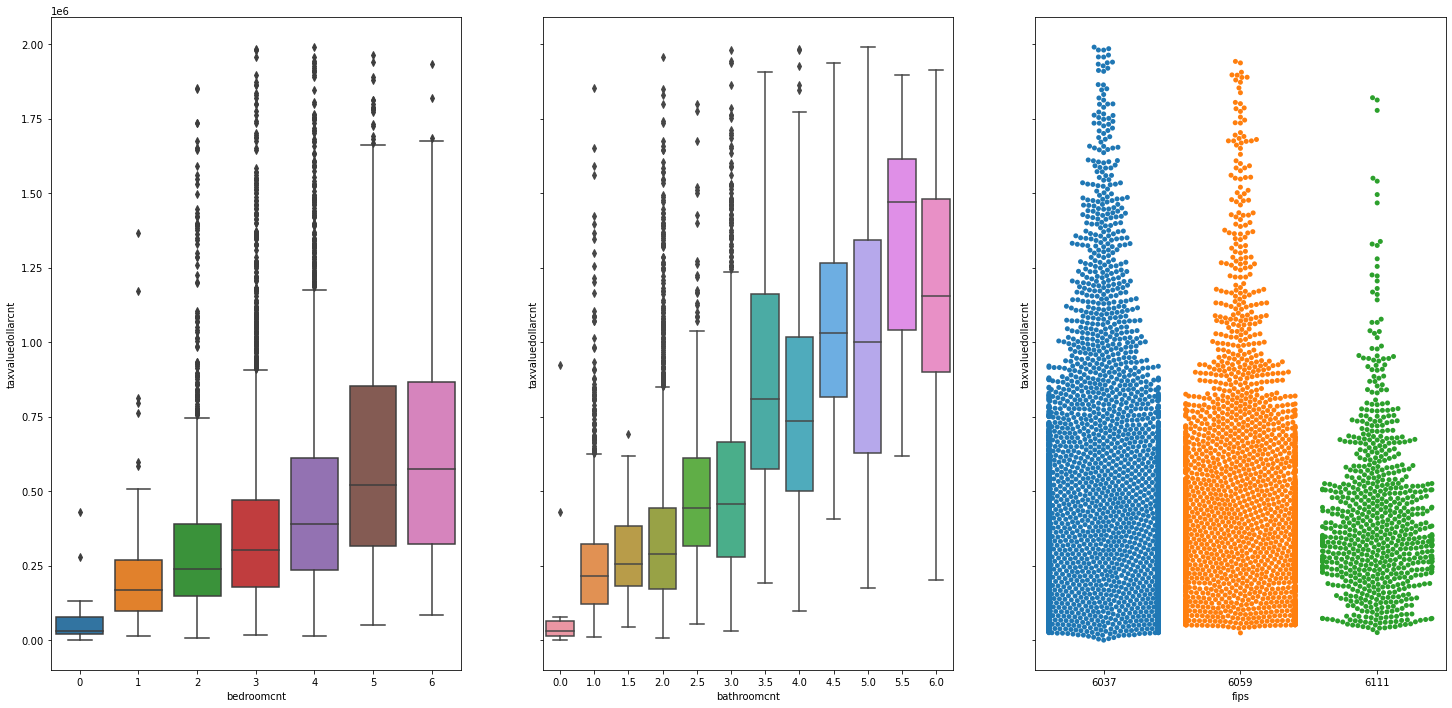

In [238]:
# bedroom, bathroom and fip

figure, axes = plt.subplots(1,3, sharey = True, figsize=(25,12))
    
sns.boxplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123), ax=axes[0])
sns.boxplot(x='bathroomcnt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123), ax=axes[1])
sns.swarmplot(x='fips', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123), ax=axes[2])

plt.show()

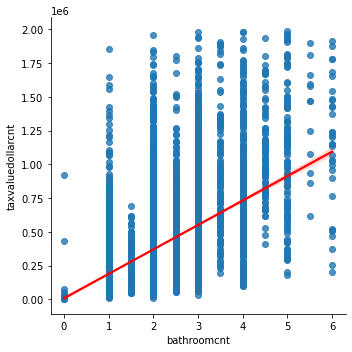

In [239]:
sns.lmplot(x='bathroomcnt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123), line_kws={'color': 'red'})

<AxesSubplot:xlabel='bedroomcnt', ylabel='taxvaluedollarcnt'>

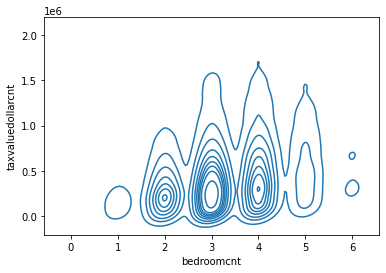

In [240]:
sns.kdeplot(x='bedroomcnt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123))

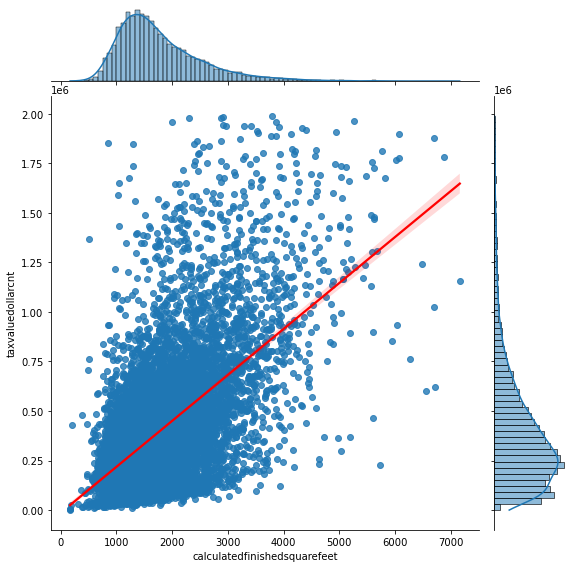

In [246]:
# yearbuilt and squarefeet

sns.jointplot("calculatedfinishedsquarefeet", "taxvaluedollarcnt", data=train.sample(10000, random_state=123), kind='reg', line_kws={'color': 'red'},height=8)

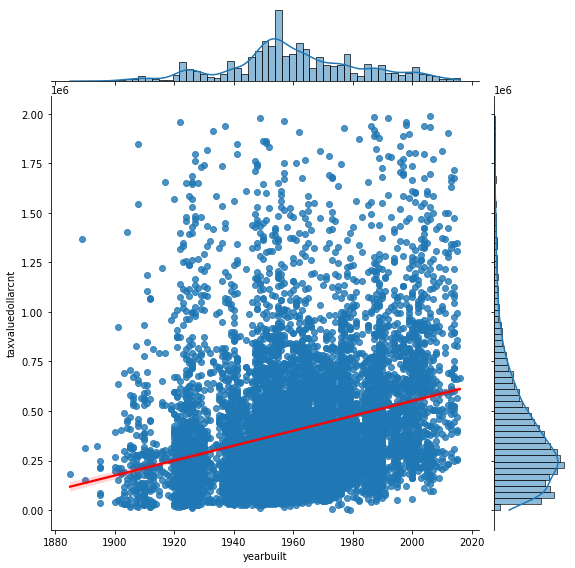

In [243]:
sns.jointplot(x='yearbuilt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123),kind='reg', line_kws={'color': 'red'}, height=8)

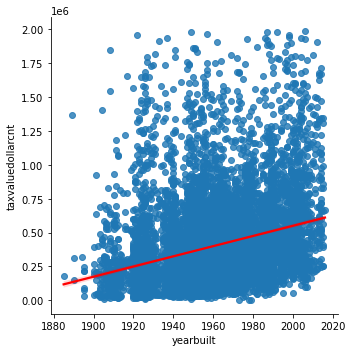

In [242]:
sns.lmplot(x='yearbuilt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123), line_kws={'color': 'red'})

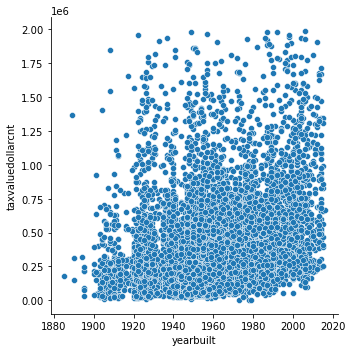

In [247]:
sns.relplot(x='yearbuilt', y='taxvaluedollarcnt', data=train.sample(10000, random_state=123))

### 9. Run the appropriate statistical tests where needed.

In [263]:
train_sample_corr = train.sample(10000, random_state=123).corr(method='pearson')
train_sample_corr

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
bedroomcnt,1.000000,0.624447,0.618866,0.266472,0.369057,0.267312,0.149385
bathroomcnt,0.624447,1.000000,0.828770,0.507996,0.517717,0.506834,0.119703
calculatedfinishedsquarefeet,0.618866,0.828770,1.000000,0.575356,0.457270,0.571107,0.128649
taxvaluedollarcnt,0.266472,0.507996,0.575356,1.000000,0.264286,0.975871,0.071655
yearbuilt,0.369057,0.517717,0.457270,0.264286,1.000000,0.268783,0.312908
taxamount,0.267312,0.506834,0.571107,0.975871,0.268783,1.000000,0.021889
fips,0.149385,0.119703,0.128649,0.071655,0.312908,0.021889,1.000000


<AxesSubplot:>

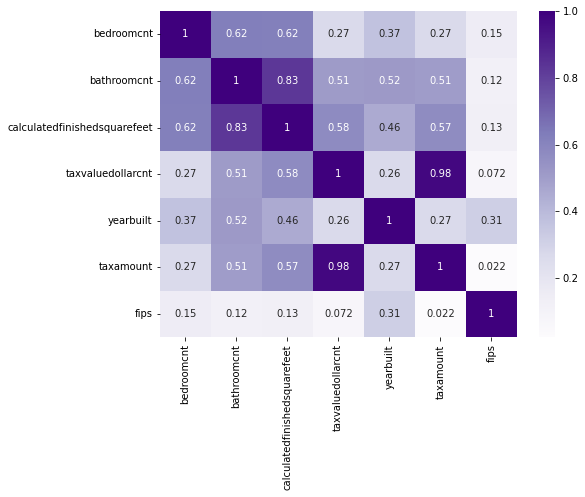

In [264]:
plt.figure(figsize=(8,6))
correlation_table = train.sample(10000, random_state=123).corr()
sns.heatmap(correlation_table, cmap='Purples', annot=True)

* Takeaway: the square feet show the highest score of 0.58, then bathroom count of 0.51

### Test Hypothesis(es)

In [265]:
# Use a scipy stats function pearsonr to calculate the correlation coefficient and the p-value.

r, p_value = pearsonr(train.calculatedfinishedsquarefeet.sample(10000, random_state=123),
                      train.taxvaluedollarcnt.sample(10000, random_state=123))
print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.5753558887245387, p-value: 0.0
We can reject the null hypothesis


In [266]:
r, p_value = pearsonr(train.bathroomcnt.sample(10000, random_state=123),
                      train.taxvaluedollarcnt.sample(10000, random_state=123))
print(f'Correlation Coefficient by Pearson Test: {r}, p-value: {p_value}')

# set alpha : 0.05
if p_value < 0.05:
    print('We can reject the null hypothesis')
else:
    print('we cannot reject the null hypothesis')

Correlation Coefficient by Pearson Test: 0.5079955116261365, p-value: 0.0
We can reject the null hypothesis


### 10. What independent variables are correlated with the dependent variable, home value?

<AxesSubplot:>

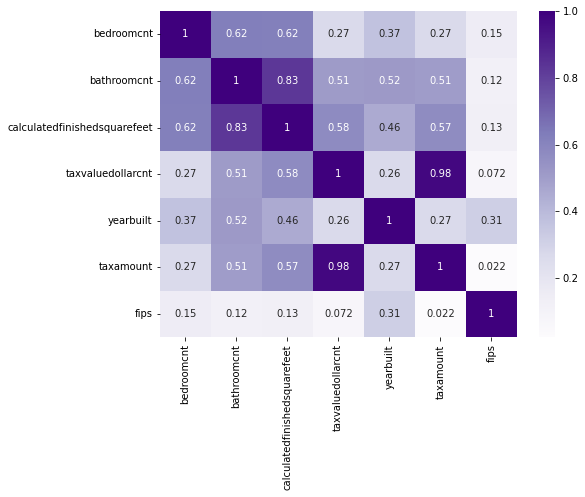

In [267]:
plt.figure(figsize=(8,6))
correlation_table = train.sample(10000, random_state=123).corr()
sns.heatmap(correlation_table, cmap='Purples', annot=True)